In [1]:
##########################################################################
# Created on Sat Nov 09 22:43:45 2021                                    #
# Python for Financial Analysis and Risk Management                      #
# @author: Meng Lipeng (FRM, CFA)                                        #
##########################################################################

# 10.2.1.Factors leading to the difference between futures and spot price

### 1.First factor-(Risk free yield)

$$F=S+I\tag{10-1}$$\
where,\
F:Future price\
S:Spot price\
I:Risk free yield

### 2.Second factor-(Convenience yield)

$$F+Y=S+I\tag{10-2}$$
$$F=S+I-Y\tag{10-3}$$
where,\
Y:Convenience yield

### 3.Third factor-(Period income)

$$F+Y+U=S+I\tag{10-4}$$
$$F=S+I-Y-U\tag{10-5}$$
where,\
U:Period income

### 4.Forth factor-(Storage cost)

$$F+Y+U=S+I+C\tag{10-6}$$
$$F=S+I+C-Y-U\tag{10-7}$$
where,\
C:Storage cost

# 10.2.2.Relationship between futures and spot price

$$Fe^{(y+u)T}=Se^{rT}+cT\tag{10-8}$$
where,
y:convenience yield(continuous compound)\
u:period income(continuous compound)\
r:risk free rate(continuous compound)\
c:annualized cash payment for storage cost(assuming paid at settlement date)\
T:Maturity in year

For commodity future,\
$$F=(S+\tilde{c}T)e^{(r-y-u)T}\tag{10-9}$$
where,\
$\tilde{c}=ce^{-rT}$

For financial future,\
$$F=Se^{(r-u)T}\tag{10-10}$$

In [2]:
def price_futures(S,r,y,u,c,T):
    '''Define a function to calculate future price
    S:spot price
    r:risk free rate(continuous compound)
    y:convenience yield(continuous compound)
    u:period income(continuous compound)
    c:annualized cash payment for storage cost(assuming paid at settlement date)
    T:Maturity in year'''
    from numpy import exp
    c_pv=c*exp(-r*T)
    F=(S+c_pv*T)*exp((r-y-u)*T)
    return F

In [4]:
spot=400.53
R_riskfree=0.02438
Y_conv=0.002
R_lease=0.005
C_storage=0.438
tenor=9/12

price_AU2104=price_futures(S=spot,r=R_riskfree,y=Y_conv,u=R_lease,c=C_storage,T=tenor)
print('The theoretical price of AU2104 contract is',round(price_AU2104,2))

The theoretical price of AU2104 contract is 406.11


/home/ec2-user/SageMaker/custom-miniconda/miniconda/envs/custom_python/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/ec2-user/SageMaker/custom-miniconda/miniconda/envs/custom_python/lib/python3.6/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/ec2-user/SageMaker/custom-miniconda/miniconda/envs/custom_python/lib/python3.6/site-pack

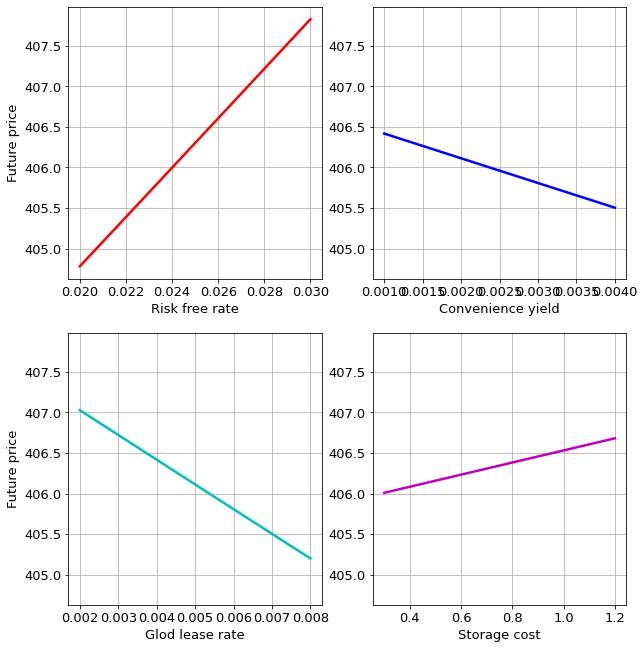

In [7]:
import matplotlib.pyplot as plt
import numpy as np

R_riskfree_list=np.linspace(0.02,0.03)
future_list1=price_futures(S=spot,r=R_riskfree_list,y=Y_conv,u=R_lease,c=C_storage,T=tenor)

Y_conv_list=np.linspace(0.001,0.004)
future_list2=price_futures(S=spot,r=R_riskfree,y=Y_conv_list,u=R_lease,c=C_storage,T=tenor)

R_lease_list=np.linspace(0.002,0.008)
future_list3=price_futures(S=spot,r=R_riskfree,y=Y_conv,u=R_lease_list,c=C_storage,T=tenor)

C_storage_list=np.linspace(0.3,1.2)
future_list4=price_futures(S=spot,r=R_riskfree,y=Y_conv,u=R_lease,c=C_storage_list,T=tenor)

plt.figure(figsize=(10,11))
plt.subplot(2,2,1)
plt.plot(R_riskfree_list,future_list1,'r-',lw=2.5)
plt.xticks(fontsize=13)
plt.xlabel('Risk free rate',fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('Future price',fontsize=13,rotation=90)
plt.grid()

plt.subplot(2,2,2,sharey=plt.subplot(2,2,1))
plt.plot(Y_conv_list,future_list2,'b-',lw=2.5)
plt.xticks(fontsize=13)
plt.xlabel('Convenience yield',fontsize=13)
plt.yticks(fontsize=13)
plt.grid()

plt.subplot(2,2,3,sharey=plt.subplot(2,2,1))
plt.plot(R_lease_list,future_list3,'c-',lw=2.5)
plt.xticks(fontsize=13)
plt.xlabel('Glod lease rate',fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('Future price',fontsize=13,rotation=90)
plt.grid()

plt.subplot(2,2,4,sharey=plt.subplot(2,2,1))
plt.plot(C_storage_list,future_list4,'m-',lw=2.5)
plt.xticks(fontsize=13)
plt.xlabel('Storage cost',fontsize=13)
plt.yticks(fontsize=13)
plt.grid()
plt.show()

# 10.2.3.Convergence of futures price

Text(0, 0.5, 'Price')

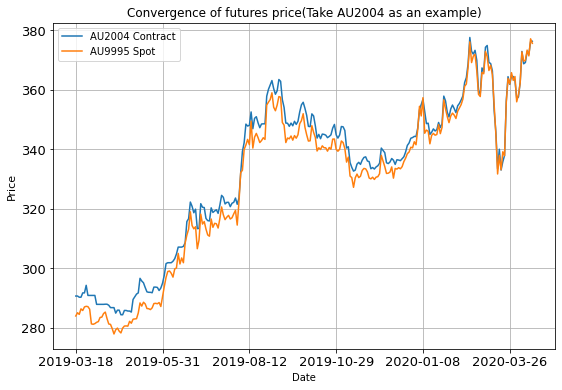

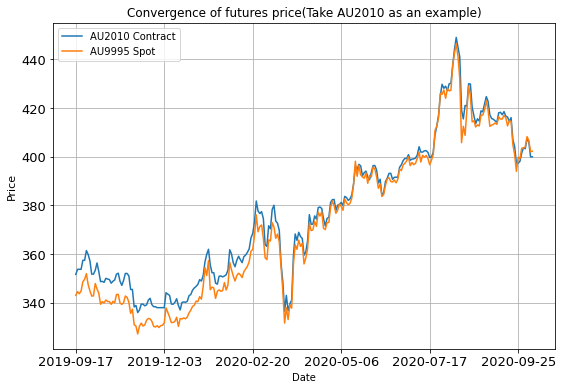

In [10]:
import pandas as pd

price_AU2004_AU9995=pd.read_excel('AU2004_AU2010_spot_price.xlsx',engine='openpyxl',sheet_name="Sheet1",header=0,index_col=0)
price_AU2004_AU9995.plot(figsize=(9,6),grid=True,fontsize=13,title='Convergence of futures price(Take AU2004 as an example)')
plt.ylabel('Price',fontsize=11)

price_AU2010_AU9995=pd.read_excel('AU2004_AU2010_spot_price.xlsx',engine='openpyxl',sheet_name="Sheet2",header=0,index_col=0)
price_AU2010_AU9995.plot(figsize=(9,6),grid=True,fontsize=13,title='Convergence of futures price(Take AU2010 as an example)')
plt.ylabel('Price',fontsize=11)